In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as impipe
import time

## Reading and understanding Dataset

In [73]:
data = pd.read_csv(r"/home/purnendu/aimlops/secom/data/CVD_cleaned.csv")
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [77]:
numerical_features = data.select_dtypes(include=['float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
print(f"Numerical Features Count = {len(numerical_features)}, Categorical Features count = {len(categorical_features)}")

Numerical Features Count = 7, Categorical Features count = 12


In [79]:
data[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [80]:
data[categorical_features].describe().transpose()

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,308854,2,No,283883
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


## Data Exploration
### Is data imbalanced?

<Axes: xlabel='Heart_Disease', ylabel='Count'>

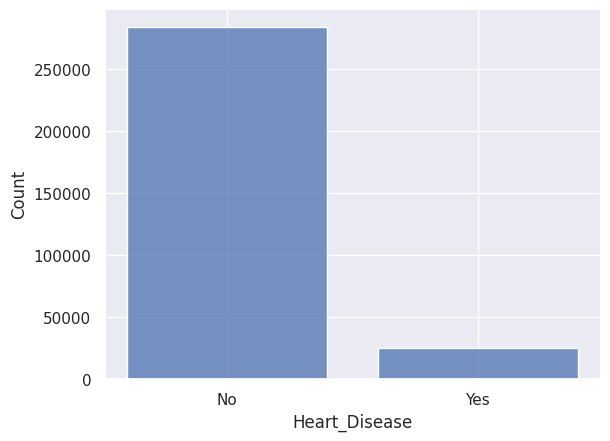

In [106]:
sns.set_theme()
sns. histplot(data=data, x="Heart_Disease", shrink=.8)

we can safely say data is imbalanced.
### What is distribution of data?


 ############################## 
 General_Health 
 ############################## 



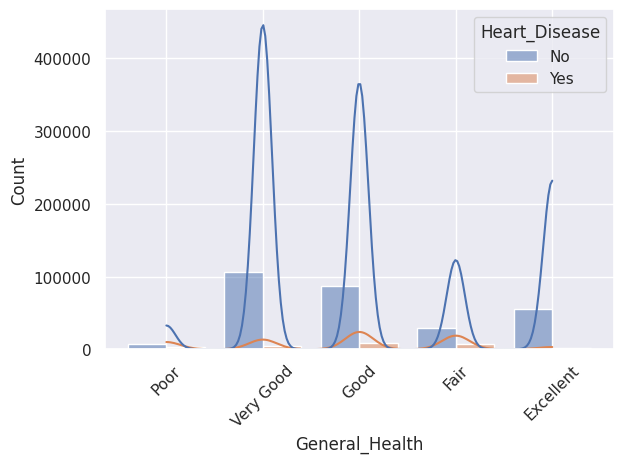


 ############################## 
 Checkup 
 ############################## 



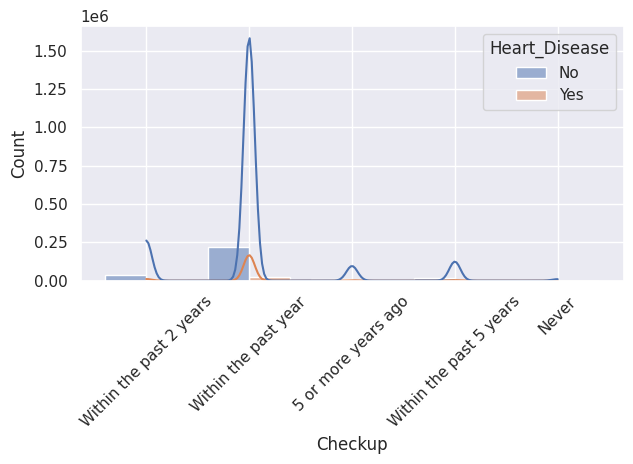


 ############################## 
 Exercise 
 ############################## 



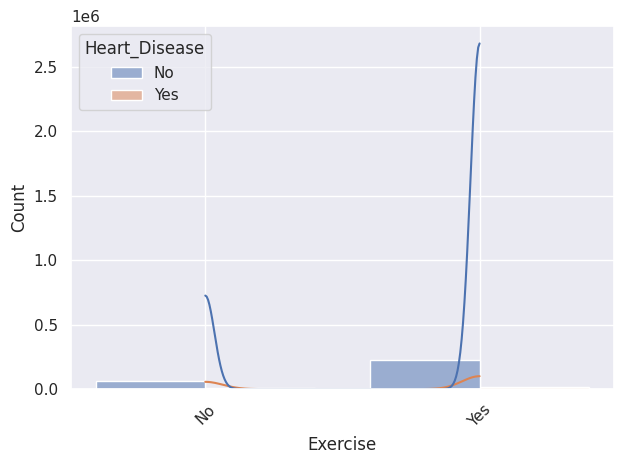


 ############################## 
 Skin_Cancer 
 ############################## 



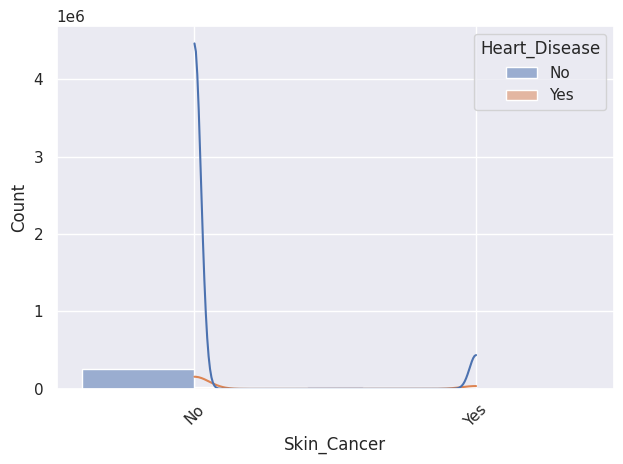


 ############################## 
 Other_Cancer 
 ############################## 



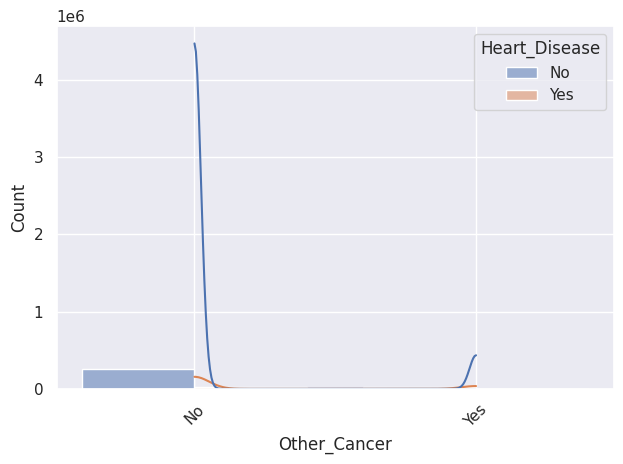


 ############################## 
 Depression 
 ############################## 



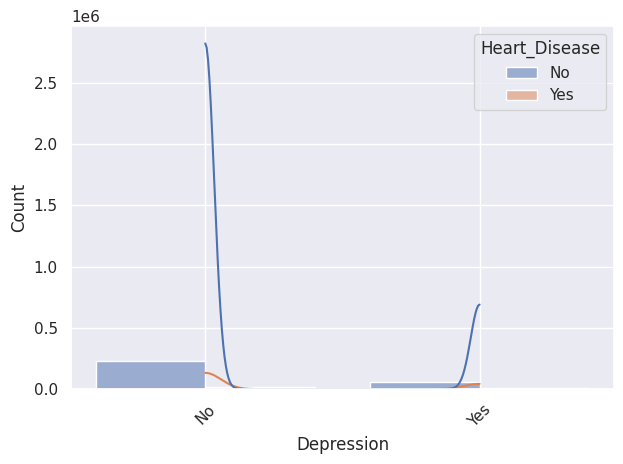


 ############################## 
 Diabetes 
 ############################## 



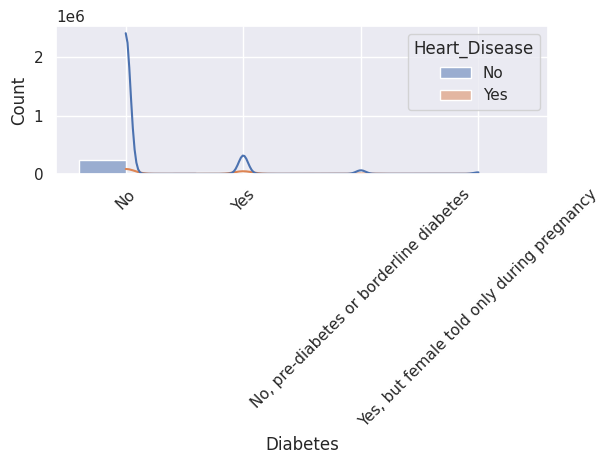


 ############################## 
 Arthritis 
 ############################## 



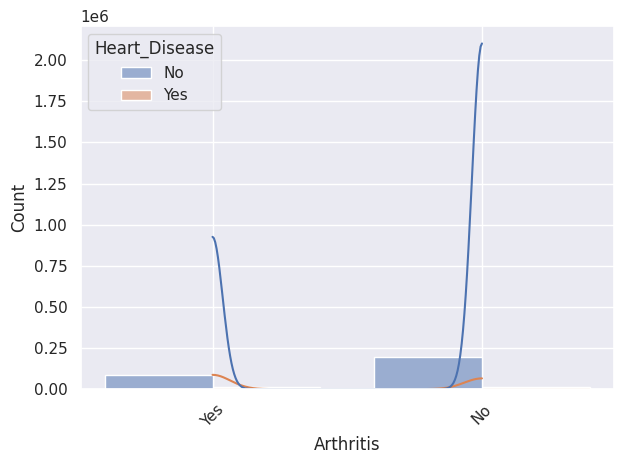


 ############################## 
 Sex 
 ############################## 



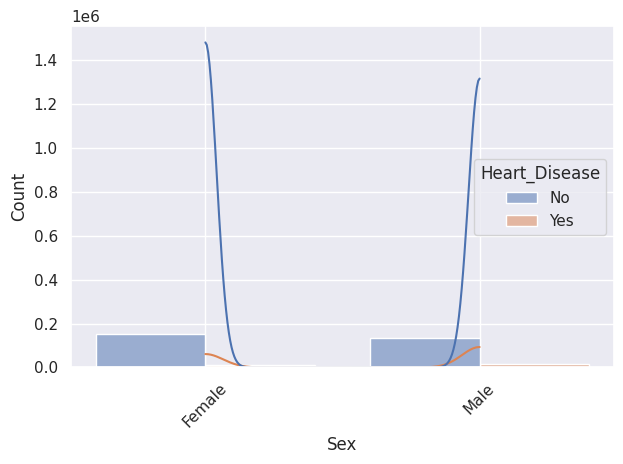


 ############################## 
 Age_Category 
 ############################## 



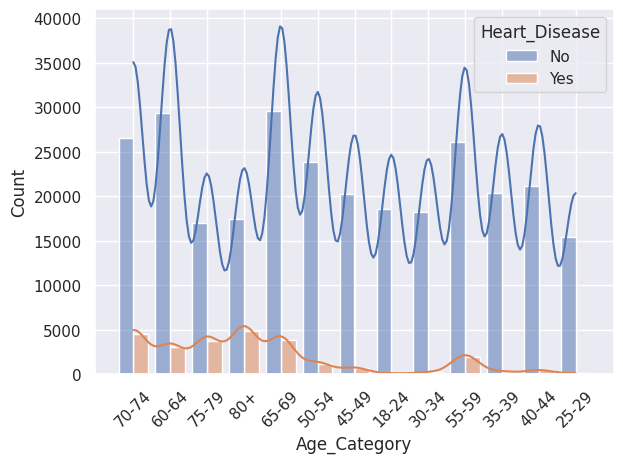


 ############################## 
 Height_(cm) 
 ############################## 



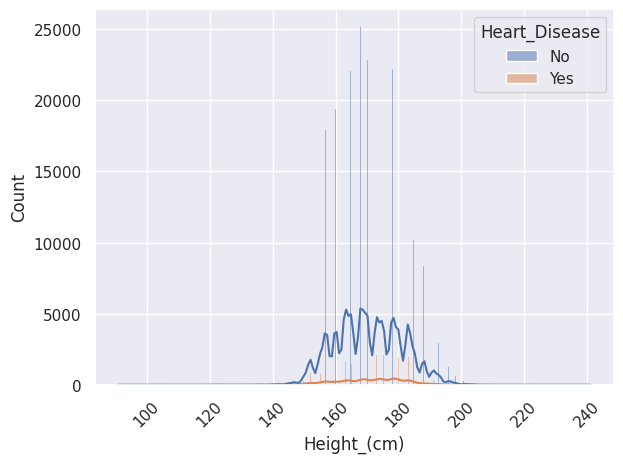


 ############################## 
 Weight_(kg) 
 ############################## 



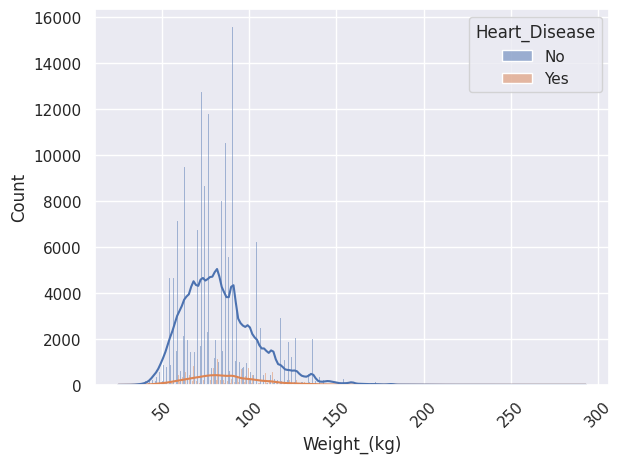


 ############################## 
 BMI 
 ############################## 



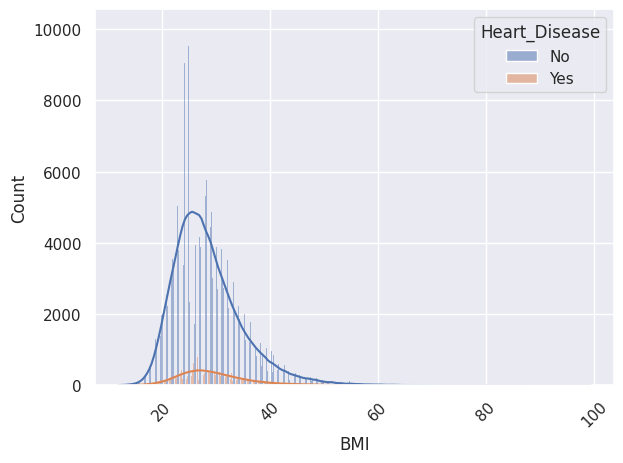


 ############################## 
 Smoking_History 
 ############################## 



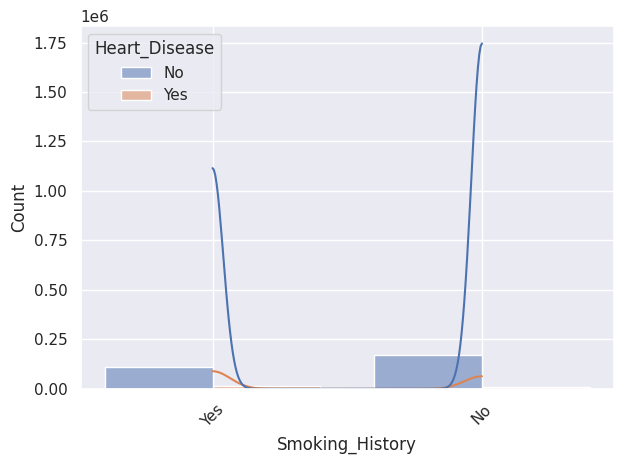


 ############################## 
 Alcohol_Consumption 
 ############################## 



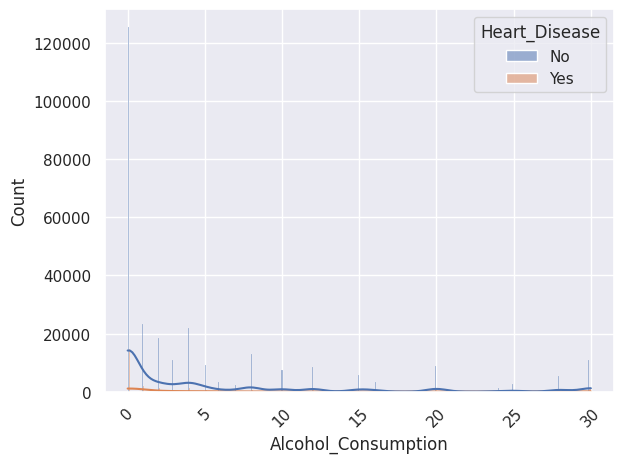


 ############################## 
 Fruit_Consumption 
 ############################## 



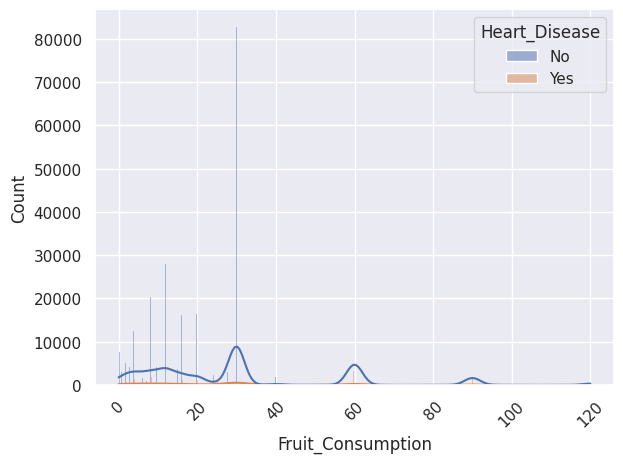


 ############################## 
 Green_Vegetables_Consumption 
 ############################## 



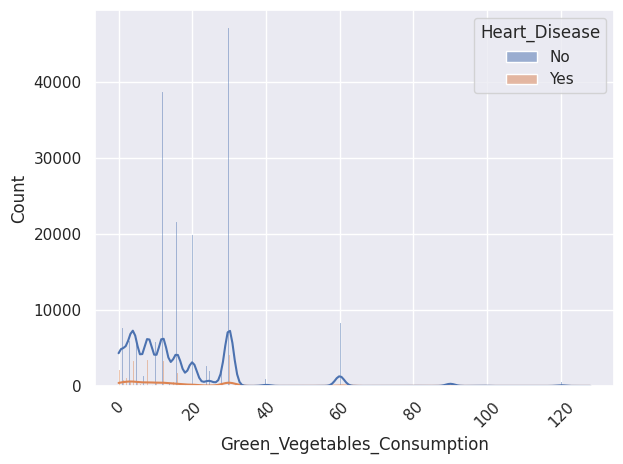


 ############################## 
 FriedPotato_Consumption 
 ############################## 



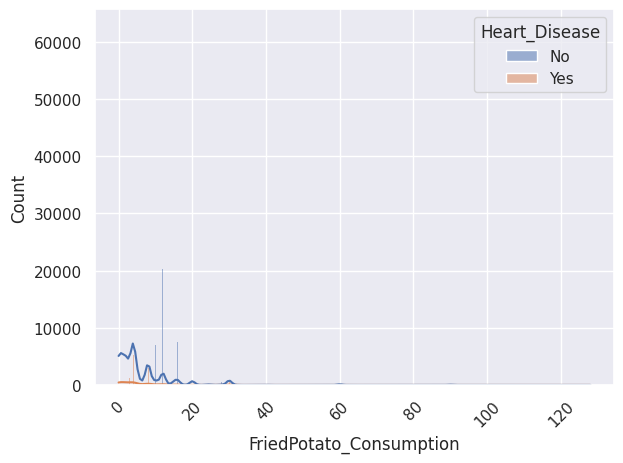

In [137]:
for val in data.columns:
    if val != "Heart_Disease":
        print("\n\r", "#"*30, "\n\r", val, "\n\r", "#"*30, "\n")
        ax = sns.histplot(data=data, x=val, hue="Heart_Disease", multiple="dodge", shrink=.8, kde=True)
        ax.tick_params(axis='x', labelrotation = 45)
        plt.tight_layout()
        plt.show()

### Are there Outliers?


 ############################## 
 Height_(cm) 
 ############################## 



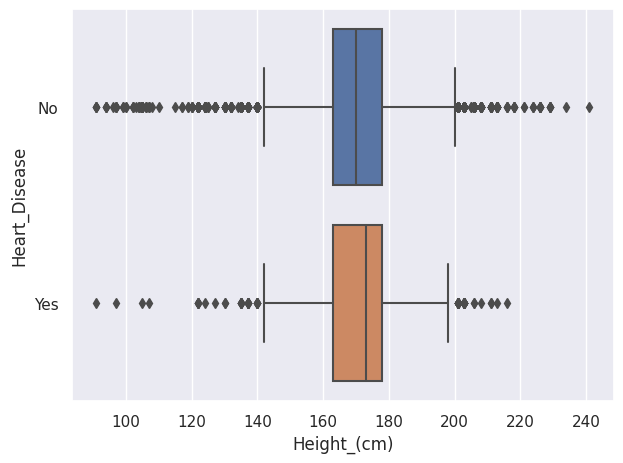


 ############################## 
 Weight_(kg) 
 ############################## 



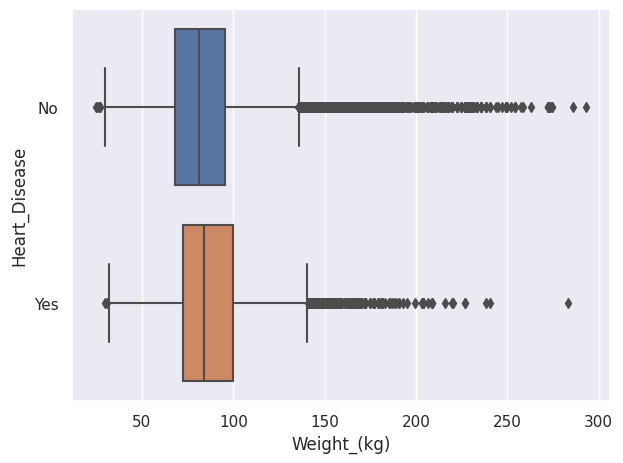


 ############################## 
 BMI 
 ############################## 



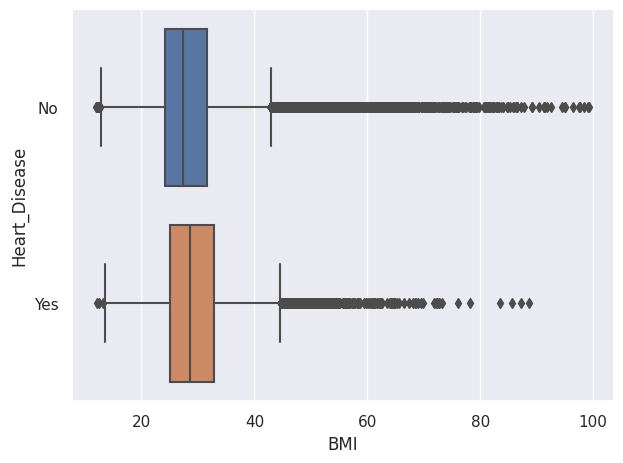


 ############################## 
 Alcohol_Consumption 
 ############################## 



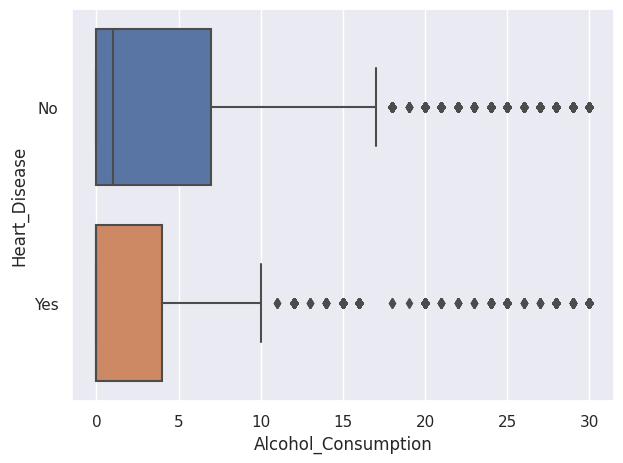


 ############################## 
 Fruit_Consumption 
 ############################## 



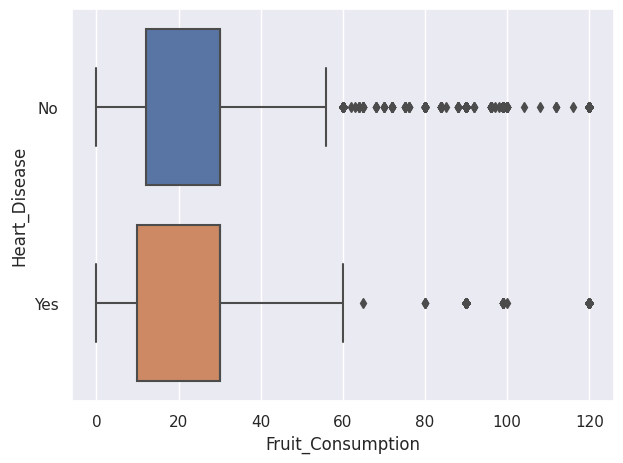


 ############################## 
 Green_Vegetables_Consumption 
 ############################## 



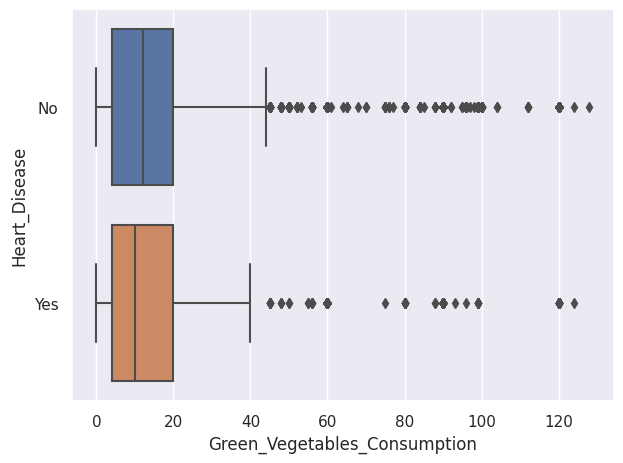


 ############################## 
 FriedPotato_Consumption 
 ############################## 



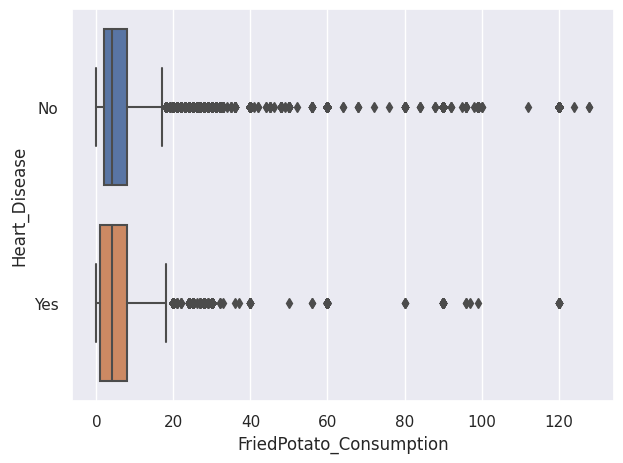

In [138]:
for val in numerical_features:
    print("\n\r", "#"*30, "\n\r", val, "\n\r", "#"*30, "\n")
    ax = sns.boxplot(data=data, x=val, y="Heart_Disease")
    plt.tight_layout()
    plt.show()

Let's Leave the outlier as it is considering that they are actual data.
### How are the features co-related?

/home/purnendu/aimlops/secom/.env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


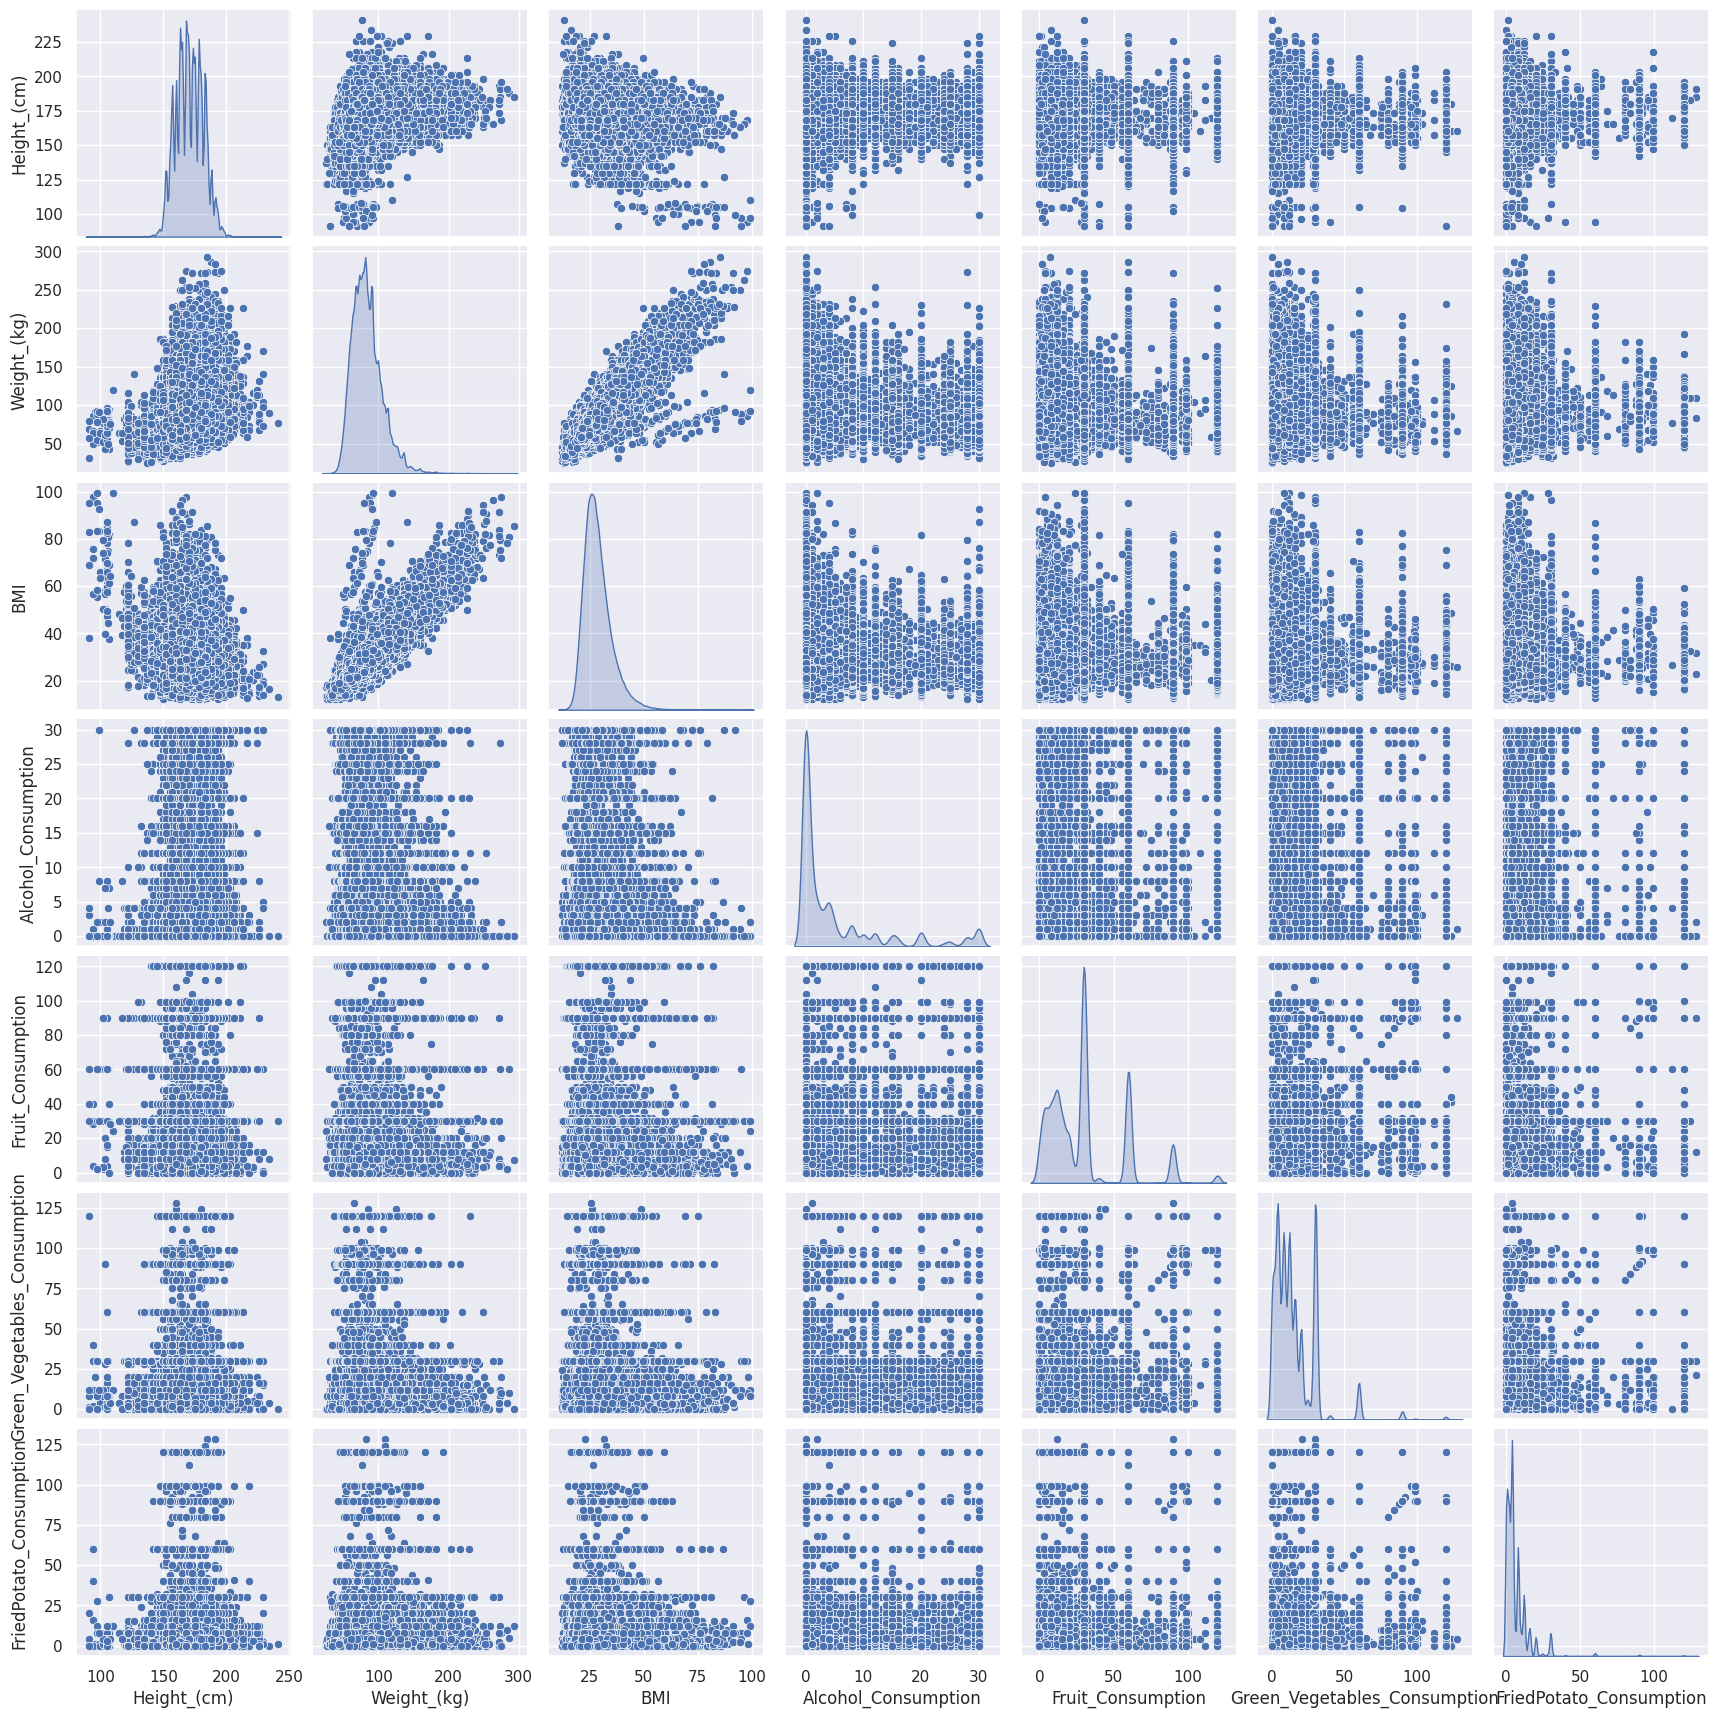

In [140]:
sns.pairplot(data=data[numerical_features], diag_kind="kde")

<Axes: >

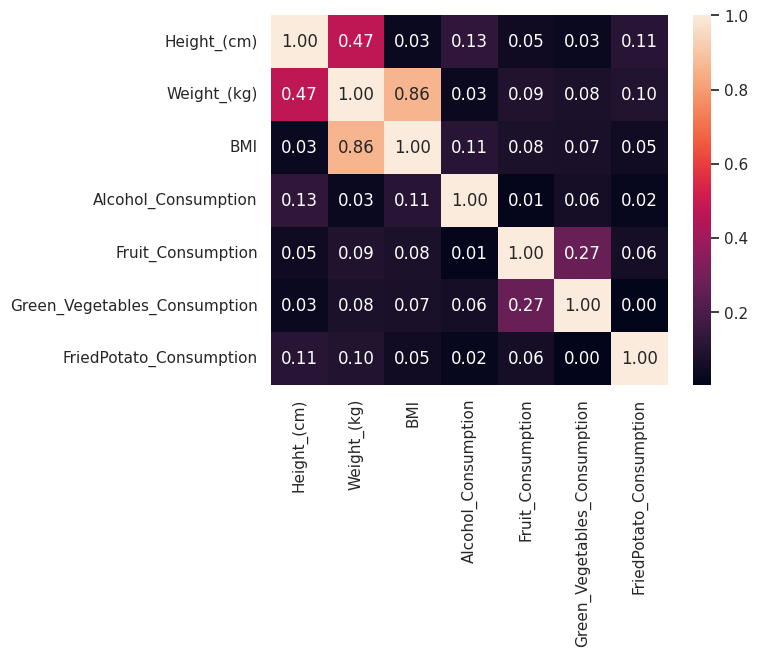

In [134]:
corr_mat = data[numerical_features].corr().abs()
sns.heatmap(corr_mat, annot=True, fmt='0.02f')

Except BMI and weight there doesn't seem to be much co-relation among numerical features.
## Pre Processing

In [141]:
data['Heart_Disease'] = data['Heart_Disease'].map({'No':0,'Yes':1})
print(data['Heart_Disease'].value_counts())

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


In [147]:
y = data['Heart_Disease']
X = data.drop(columns=['Heart_Disease'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
print(f"Train Shape:\n    X:{X_train.shape}\n    y:{y_train.shape}")
print(f"Test Shape:\n    X:{X_test.shape}\n    y:{y_test.shape}")

Train Shape:
    X:(231640, 18)
    y:(231640,)
Test Shape:
    X:(77214, 18)
    y:(77214,)


In [150]:
y_train.value_counts()/len(y_train)

Heart_Disease
0    0.919137
1    0.080863
Name: count, dtype: float64

In [153]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore',drop='first'))
])
    
## Age Category Pipeline
age_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder",OrdinalEncoder())
])

## General Health Pipeline
genhealth_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Fair")),
    ("encoder",OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']]))
])

## Checkup Pipeline
checkup_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value='Within the past 5 years')),
    ("encoder",OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']]))
])

In [216]:
num_features = numerical_features
cat_features = categorical_features.drop(["General_Health", "Heart_Disease", "Age_Category", "Checkup"])
preprocessing = ColumnTransformer(transformers=[
    ("numerical", numeric_pipeline, num_features),
    ("categorical", cat_pipeline, cat_features),
    ("age", age_pipeline, ["Age_Category"]),
    ("general", genhealth_pipeline, ["General_Health"]),
    ("checkup", checkup_pipeline, ["Checkup"])
])
preprocessing

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]))]),
                                 ['General_Health']),
                                ('checkup',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Within '
                                                                           'the '
                                                                           'past '
                                                                           '5 '
                                                                           'years',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Within '
                                                                              'the '
                                                                              'past '
                                                                              'year',
                                                                              'Within '
                                                                              'the '
                                                                              'past '
                                                                              '2 '
                                                                              'years',
                                                                              'Within '
                                                                              'the '
                                                                              'past '
                                                                              '5 '
                                                                              'years',
                                                                              '5 '
                                                                              'or '
                                                                              'more '
                                                                              'years '
                                                                              'ago',
                                                                              'Never']]))]),
                                 ['Checkup'])])

In [159]:
train_preprocessed = preprocessing.fit_transform(X_train)
train_preprocessed.shape

(231640, 20)

## Models Evaluation

In [161]:
kfol = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)

In [277]:
randstate = 11
models = {
    'Logistic_Regression':{
        'estimator':LogisticRegression(random_state=randstate),
        'parameters':{
            'grid__max_iter':[500, 1000, 1500],
            'grid__solver':['lbfgs', 'newton-cholesky', 'sag']
        }
    },
    'SGD':{
        'estimator':SGDClassifier(random_state=randstate, n_jobs=-1, early_stopping=True),
        'parameters':{
            'grid__loss':['log_loss', 'perceptron', 'squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive']
        }
    },
    'K-Nearest_Neighbor':{
        'estimator': KNeighborsClassifier(n_jobs=-1),
        'parameters':{
            'grid__n_neighbors':[3, 5]
        }
    },
    'GaussianNB':{
        'estimator': GaussianNB(),
        'parameters':{
            'grid__var_smoothing':[1e-6, 1e-7, 1e-8]
        }
    },
    'Decision Tree':{
        'estimator':DecisionTreeClassifier(random_state=randstate),
        'parameters':{
            'grid__criterion':['gini', 'entropy', 'log_loss'],
            'grid__max_depth':[5,10,20],            
            'grid__min_impurity_decrease':[0.01, 0.05]
        }
    },
    'Random_Forest':{
        'estimator': RandomForestClassifier(random_state=randstate),
        'parameters':{
            'grid__n_estimators':[100,200, 400],
            'grid__max_depth':[2, 5, 7, 10],
            'grid__min_impurity_decrease':[0.01, 0.05]
        }
    },
    'AdaBoost':{
        'estimator':AdaBoostClassifier(random_state=randstate),
        'parameters':{
            'grid__n_estimators':[50, 100, 200],
            'grid__learning_rate':[0.5, 1, 2]
        }
    },
    'GradientBoost':{
        'estimator':GradientBoostingClassifier(random_state=randstate),
        'parameters':{
            'grid__n_estimators':[20,50,70],
            'grid__learning_rate':[0.01, 0.1],
            'grid__max_depth':[3, 5, 7],
        }
    }
}
scores = {}

### Grid Search With Undersampled data

We are setting score to recall as we want no false negative case.

In [281]:
for model_name,model in models.items():
    model_pipeline = impipe(steps=[
        ('pre', preprocessing),
        ('under', RandomUnderSampler(random_state=randstate)),
        ('grid', model['estimator'])
    ])
    clf = GridSearchCV(
        model_pipeline,
        param_grid=model['parameters'],
        scoring='recall',
        cv = kfol
    )
    now = time.time()
    mdl = clf.fit(X_train, y_train)
    best_param = {name.replace("grid__",  ""):val for name,val in clf.best_params_.items()}
    scores[model_name] = best_param
    print("#"*50)
    print(model_name, best_param)
    print("_"*50)
    for name, dat in {'train':[X_train, y_train], 'test':[X_test, y_test]}.items():
        infr = time.time()
        y_pred = mdl.predict(dat[0])
        Tn, Fp, Fn, Tp = confusion_matrix(dat[1], y_pred).ravel()
        scores[model_name]["True Negative"]=Tn
        scores[model_name]["False Positive"]=Fp
        scores[model_name]["False Negative"]=Fn
        scores[model_name]["True Positive"]=Tp
        infr_t = (time.time() - infr)
        speed = len(y_pred)/infr_t
        report = classification_report(dat[1], y_pred, output_dict=True)
        print(name, f"Accuracy = {report['accuracy']:0.02f}%, Inference = {speed:0.02}predictions/sec")
        del report['accuracy']
        report_df = pd.DataFrame(report).T
        print("_"*50)
        print(report_df)    
        print("_"*50)    
        scores[model_name][f'{name}_Report']  = report
    y_pred = mdl.predict(X)
    Tn, Fp, Fn, Tp = confusion_matrix(y, y_pred).ravel()
    scores[model_name]["True Negative"]=Tn
    scores[model_name]["False Positive"]=Fp
    scores[model_name]["False Negative"]=Fn
    scores[model_name]["True Positive"]=Tp
    print(f"Time Elapsed: {time.time()-now :0.2f}s")

##################################################
Logistic_Regression {'max_iter': 500, 'solver': 'sag'}
__________________________________________________
train Accuracy = 0.74%, Inference = 3.1e+05predictions/sec
__________________________________________________
              precision    recall  f1-score   support
0              0.975632  0.730199  0.835259  212909.0
1              0.205392  0.792697  0.326251   18731.0
macro avg      0.590512  0.761448  0.580755  231640.0
weighted avg   0.913349  0.735253  0.794100  231640.0
__________________________________________________
test Accuracy = 0.73%, Inference = 2.6e+05predictions/sec
__________________________________________________
              precision    recall  f1-score  support
0              0.974339  0.730253  0.834821  70974.0
1              0.202956  0.781250  0.322208   6240.0
macro avg      0.588648  0.755752  0.578514  77214.0
weighted avg   0.912000  0.734375  0.793394  77214.0
______________________________________

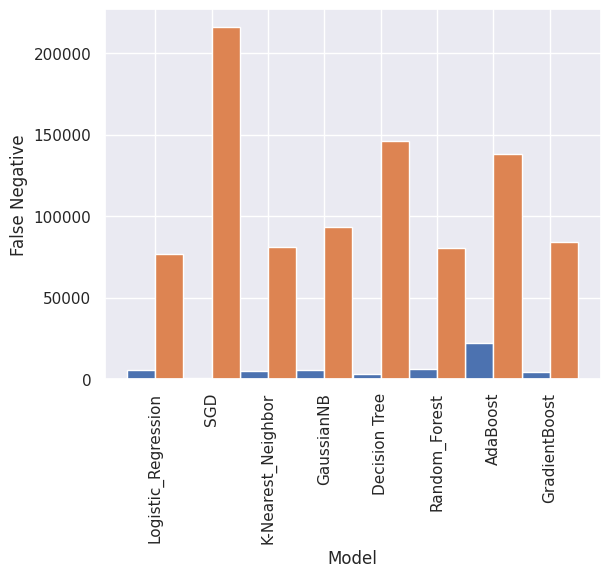

In [295]:
md = list(scores.keys())
x=np.arange(len(md))
fn = [scores[k]["False Negative"] for k in scores.keys()]
fp = [scores[k]["False Positive"] for k in scores.keys()]
plt.bar(x-0.25, fn, width=0.5)
plt.bar(x+0.25, fp, width=0.5)
plt.xlabel("Model")
plt.ylabel("False Negative")
plt.xticks(x, md, rotation = 90)
plt.show()

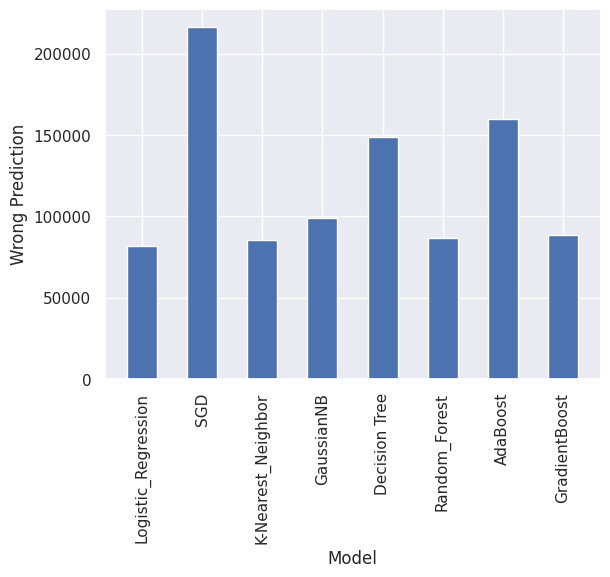

In [296]:
md = list(scores.keys())
fn = np.array([scores[k]["False Negative"] for k in scores.keys()])
fp = np.array([scores[k]["False Positive"] for k in scores.keys()])
plt.bar(md, fn+fp, width=0.5)
plt.xlabel("Model")
plt.ylabel("Wrong Prediction")
plt.xticks(rotation = 90)
plt.show()

In [299]:
{m:f for m,f in zip(md,fn+fp)}

{'Logistic_Regression': 81836,
 'SGD': 216408,
 'K-Nearest_Neighbor': 85699,
 'GaussianNB': 98920,
 'Decision Tree': 148966,
 'Random_Forest': 86454,
 'AdaBoost': 159888,
 'GradientBoost': 88729}

Clearly KNN, RandomForest and Gradient Boost have comparable results in wrong predictions

In [300]:
{m:f for m,f in zip(md,fn)}

{'Logistic_Regression': 5248,
 'SGD': 386,
 'K-Nearest_Neighbor': 4925,
 'GaussianNB': 5406,
 'Decision Tree': 2976,
 'Random_Forest': 6266,
 'AdaBoost': 21995,
 'GradientBoost': 4528}

Among the most accurate top three gradient boost has least amount of false negatives. Hence we are going to go ahead with gradient boost.

### Over Sampling
Will oversampling to balance the data improve result?

In [302]:
model_pipeline = impipe(steps=[
    ('pre', preprocessing),
    ('over', SMOTE(random_state=11)),
    ('grid', GradientBoostingClassifier(random_state=randstate, learning_rate=0.1, max_depth=5, n_estimators=20))
])

now = time.time()
smt = model_pipeline.fit(X_train, y_train)
print("#"*50)
for name, dat in {'train':[X_train, y_train], 'test':[X_test, y_test]}.items():
    infr = time.time()
    y_pred = smt.predict(dat[0])
    infr_t = (time.time() - infr)
    speed = len(y_pred)/infr_t
    report = classification_report(dat[1], y_pred, output_dict=True)
    print(name, f"Accuracy = {report['accuracy']:0.02f}%, Inference = {speed:0.02}predictions/sec")
    del report['accuracy']
    report_df = pd.DataFrame(report).T
    print("_"*50)
    print(report_df)    
    print("_"*50)   
y_pred=smt.predict(X)
Tn, Fp, Fn, Tp = confusion_matrix(y, y_pred).ravel()
print(f"Time Elapsed: {time.time()-now :0.2f}s, False Positive={Fp}, False Negative={Fn}")

##################################################
train Accuracy = 0.80%, Inference = 2.8e+05predictions/sec
__________________________________________________
              precision    recall  f1-score   support
0              0.964876  0.806781  0.878775  212909.0
1              0.232729  0.666168  0.344949   18731.0
macro avg      0.598802  0.736475  0.611862  231640.0
weighted avg   0.905672  0.795411  0.835608  231640.0
__________________________________________________
test Accuracy = 0.79%, Inference = 2.4e+05predictions/sec
__________________________________________________
              precision    recall  f1-score  support
0              0.963881  0.804633  0.877087  70974.0
1              0.228209  0.657051  0.338759   6240.0
macro avg      0.596045  0.730842  0.607923  77214.0
weighted avg   0.904428  0.792706  0.833582  77214.0
__________________________________________________
Time Elapsed: 64.89s, False Positive=55004, False Negative=8393


With Over sampling of data, surely Accuracy has increased from 71% to 80% but False negative has also increased from 4528 to 8393. which is not acceptable.

### Unbalanced data

In [303]:
model_pipeline = impipe(steps=[
    ('pre', preprocessing),
    ('grid', GradientBoostingClassifier(random_state=randstate, learning_rate=0.1, max_depth=5, n_estimators=20))
])

now = time.time()
smt = model_pipeline.fit(X_train, y_train)
print("#"*50)
for name, dat in {'train':[X_train, y_train], 'test':[X_test, y_test]}.items():
    infr = time.time()
    y_pred = smt.predict(dat[0])
    infr_t = (time.time() - infr)
    speed = len(y_pred)/infr_t
    report = classification_report(dat[1], y_pred, output_dict=True)
    print(name, f"Accuracy = {report['accuracy']:0.02f}%, Inference = {speed:0.02}predictions/sec")
    del report['accuracy']
    report_df = pd.DataFrame(report).T
    print("_"*50)
    print(report_df)    
    print("_"*50)   
y_pred=smt.predict(X)
Tn, Fp, Fn, Tp = confusion_matrix(y, y_pred).ravel()
print(f"Time Elapsed: {time.time()-now :0.2f}s, False Positive={Fp}, False Negative={Fn}")

##################################################
train Accuracy = 0.92%, Inference = 2.8e+05predictions/sec
__________________________________________________
              precision    recall  f1-score   support
0              0.919762  0.999530  0.957988  212909.0
1              0.624060  0.008862  0.017476   18731.0
macro avg      0.771911  0.504196  0.487732  231640.0
weighted avg   0.895851  0.919422  0.881936  231640.0
__________________________________________________
test Accuracy = 0.92%, Inference = 2.6e+05predictions/sec
__________________________________________________
              precision    recall  f1-score  support
0              0.919795  0.999535  0.958008  70974.0
1              0.620690  0.008654  0.017070   6240.0
macro avg      0.770242  0.504094  0.487539  77214.0
weighted avg   0.895623  0.919458  0.881967  77214.0
__________________________________________________
Time Elapsed: 21.94s, False Positive=133, False Negative=24751


Case of unbalanced data is worst, False negative has gone up by 5x.

In [326]:
gb = scores['GradientBoost']
tnn = gb['True Negative']/y.value_counts()[0]
fnn = gb['False Negative']/y.value_counts()[1]
tpn = gb['True Positive']/y.value_counts()[1]
fpn = gb['False Positive']/y.value_counts()[0]
f"with Under sampling, False Negative percent from data is: {gb['False Negative']*100/len(X) :0.02f} %"

'with Under sampling, False Negative percent from data is: 1.47 %'

In [332]:
f"with Under sampling, False Positive percent from data is: {gb['False Positive']*100/len(X) :0.02f} %"

'with Under sampling, False Positive percent from data is: 27.26 %'

In [327]:
f"with Under sampling, Confidance of False result is: {tnn*100/(fnn+tnn) :0.02f} %"

'with Under sampling, Confidance of False result is: 79.50 %'

In [328]:
f"with Under sampling, Confidance of True result is: {tpn*100/(fpn+tpn) :0.02f} %"

'with Under sampling, Confidance of True result is: 73.41 %'